In [118]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats as stats

In [119]:
Data = Path ("Resources/FoodEnvironmentAtlas.xls")

In [120]:
Data_health = pd.read_excel(Data, sheet_name = "HEALTH")
Data_health.head()

,FIPS,State,County,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS12,PCT_OBESE_ADULTS17,PCT_HSPA17,RECFAC11,RECFAC16,PCH_RECFAC_11_16,RECFACPTH11,RECFACPTH16,PCH_RECFACPTH_11_16
0,1001,AL,Autauga,11.4,13.0,33.0,36.3,NaN,4,6,50.000000,0.072465,0.108542,49.785629
1,1003,AL,Baldwin,9.8,10.4,33.0,36.3,NaN,16,21,31.250000,0.085775,0.101200,17.983256
2,1005,AL,Barbour,13.6,18.4,33.0,36.3,NaN,2,0,-100.000000,0.073123,0.000000,-100.000000
3,1007,AL,Bibb,11.1,14.8,33.0,36.3,NaN,0,1,NaN,0.000000,0.044183,NaN
4,1009,AL,Blount,11.4,14.1,33.0,36.3,NaN,3,4,33.333333,0.052118,0.069490,33.333333


In [121]:
Data_socio = pd.read_excel(Data, sheet_name = "SOCIOECONOMIC")
Data_socio.head()

,FIPS,State,County,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,1001,AL,Autauga,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,0,18.8,0,1,0.0
1,1003,AL,Baldwin,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,0,19.6,0,1,0.0
2,1005,AL,Barbour,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,1,45.2,1,0,0.0
3,1007,AL,Bibb,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,0,29.3,1,1,0.0
4,1009,AL,Blount,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,0,22.2,0,1,0.0


In [122]:
Data_rest = pd.read_excel(Data, sheet_name = "RESTAURANTS")
Data_rest.head()

,FIPS,State,County,FFR11,FFR16,PCH_FFR_11_16,FFRPTH11,FFRPTH16,PCH_FFRPTH_11_16,FSR11,FSR16,PCH_FSR_11_16,FSRPTH11,FSRPTH16,PCH_FSRPTH_11_16,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,1001,AL,Autauga,34,44,29.411765,0.615953,0.795977,29.226817,32,31,-3.125000,0.579721,0.560802,-3.263448,649.511367,674.80272,484.381507,512.280987
1,1003,AL,Baldwin,121,156,28.925620,0.648675,0.751775,15.893824,216,236,9.259259,1.157966,1.137300,-1.784662,649.511367,674.80272,484.381507,512.280987
2,1005,AL,Barbour,19,23,21.052632,0.694673,0.892372,28.459320,17,14,-17.647059,0.621549,0.543183,-12.608237,649.511367,674.80272,484.381507,512.280987
3,1007,AL,Bibb,6,7,16.666667,0.263794,0.309283,17.243995,5,7,40.000000,0.219829,0.309283,40.692794,649.511367,674.80272,484.381507,512.280987
4,1009,AL,Blount,20,23,15.000000,0.347451,0.399569,15.000000,15,12,-20.000000,0.260589,0.208471,-20.000000,649.511367,674.80272,484.381507,512.280987


In [123]:
df_merg1 = pd.merge(Data_health, Data_socio, on = "FIPS")
df_merg1

,FIPS,State_x,County_x,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS12,PCT_OBESE_ADULTS17,PCT_HSPA17,RECFAC11,RECFAC16,...,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,1001,AL,Autauga,11.4,13.0,33.0,36.3,NaN,4,6,...,0.040314,11.995382,26.777959,56580.0,12.7,0,18.8,0,1,0.0
1,1003,AL,Baldwin,9.8,10.4,33.0,36.3,NaN,16,21,...,0.043343,16.771185,22.987408,52387.0,12.9,0,19.6,0,1,0.0
2,1005,AL,Barbour,13.6,18.4,33.0,36.3,NaN,2,0,...,0.087409,14.236807,21.906982,31433.0,32.0,1,45.2,1,0,0.0
3,1007,AL,Bibb,11.1,14.8,33.0,36.3,NaN,0,1,...,0.030548,12.681650,22.696923,40767.0,22.2,0,29.3,1,1,0.0
4,1009,AL,Blount,11.4,14.1,33.0,36.3,NaN,3,4,...,0.031402,14.722096,24.608353,50487.0,14.7,0,22.2,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,6.8,8.1,24.6,28.8,NaN,4,6,...,0.093594,8.316212,27.094462,71867.0,8.5,0,10.2,0,0,0.0
3139,56039,WY,Teton,4.1,4.8,24.6,28.8,NaN,9,13,...,0.061050,9.852541,19.141542,83290.0,6.6,0,7.6,0,0,0.0
3140,56041,WY,Uinta,6.3,9.0,24.6,28.8,NaN,3,2,...,0.161000,8.873946,30.168577,62968.0,9.8,0,11.9,0,0,0.0
3141,56043,WY,Washakie,10.5,12.0,24.6,28.8,NaN,1,1,...,0.011719,17.672565,25.454119,56088.0,11.2,0,15.7,0,0,0.0


In [124]:
df_merg2 = pd.merge(df_merg1, Data_rest, on = "FIPS" )
df_merg2

,FIPS,State_x,County_x,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS12,PCT_OBESE_ADULTS17,PCT_HSPA17,RECFAC11,RECFAC16,...,FSR11,FSR16,PCH_FSR_11_16,FSRPTH11,FSRPTH16,PCH_FSRPTH_11_16,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,1001,AL,Autauga,11.4,13.0,33.0,36.3,NaN,4,6,...,32,31,-3.125000,0.579721,0.560802,-3.263448,649.511367,674.802720,484.381507,512.280987
1,1003,AL,Baldwin,9.8,10.4,33.0,36.3,NaN,16,21,...,216,236,9.259259,1.157966,1.137300,-1.784662,649.511367,674.802720,484.381507,512.280987
2,1005,AL,Barbour,13.6,18.4,33.0,36.3,NaN,2,0,...,17,14,-17.647059,0.621549,0.543183,-12.608237,649.511367,674.802720,484.381507,512.280987
3,1007,AL,Bibb,11.1,14.8,33.0,36.3,NaN,0,1,...,5,7,40.000000,0.219829,0.309283,40.692794,649.511367,674.802720,484.381507,512.280987
4,1009,AL,Blount,11.4,14.1,33.0,36.3,NaN,3,4,...,15,12,-20.000000,0.260589,0.208471,-20.000000,649.511367,674.802720,484.381507,512.280987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,6.8,8.1,24.6,28.8,NaN,4,6,...,33,32,-3.030303,0.749778,0.723246,-3.538767,656.208610,598.027144,715.635645,706.676425
3139,56039,WY,Teton,4.1,4.8,24.6,28.8,NaN,9,13,...,57,59,3.508772,2.654126,2.545298,-4.100328,656.208610,598.027144,715.635645,706.676425
3140,56041,WY,Uinta,6.3,9.0,24.6,28.8,NaN,3,2,...,25,19,-24.000000,1.196229,0.917387,-23.310125,656.208610,598.027144,715.635645,706.676425
3141,56043,WY,Washakie,10.5,12.0,24.6,28.8,NaN,1,1,...,14,12,-14.285714,1.654846,1.465559,-11.438342,656.208610,598.027144,715.635645,706.676425


In [125]:
print(df_merg2.columns)

Index(['FIPS', 'State_x', 'County_x', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS12', 'PCT_OBESE_ADULTS17',
       'PCT_HSPA17', 'RECFAC11', 'RECFAC16', 'PCH_RECFAC_11_16', 'RECFACPTH11',
       'RECFACPTH16', 'PCH_RECFACPTH_11_16', 'State_y', 'County_y',
       'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10',
       'PCT_NHNA10', 'PCT_NHPI10', 'PCT_65OLDER10', 'PCT_18YOUNGER10',
       'MEDHHINC15', 'POVRATE15', 'PERPOV10', 'CHILDPOVRATE15', 'PERCHLDPOV10',
       'METRO13', 'POPLOSS10', 'State', 'County', 'FFR11', 'FFR16',
       'PCH_FFR_11_16', 'FFRPTH11', 'FFRPTH16', 'PCH_FFRPTH_11_16', 'FSR11',
       'FSR16', 'PCH_FSR_11_16', 'FSRPTH11', 'FSRPTH16', 'PCH_FSRPTH_11_16',
       'PC_FFRSALES07', 'PC_FFRSALES12', 'PC_FSRSALES07', 'PC_FSRSALES12'],
      dtype='object')


In [126]:
del df_merg2["State_y"]
del df_merg2["County_y"]
del df_merg2["State"]
del df_merg2["County"]
df_merg2.columns

Index(['FIPS', 'State_x', 'County_x', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS12', 'PCT_OBESE_ADULTS17',
       'PCT_HSPA17', 'RECFAC11', 'RECFAC16', 'PCH_RECFAC_11_16', 'RECFACPTH11',
       'RECFACPTH16', 'PCH_RECFACPTH_11_16', 'PCT_NHWHITE10', 'PCT_NHBLACK10',
       'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
       'PCT_65OLDER10', 'PCT_18YOUNGER10', 'MEDHHINC15', 'POVRATE15',
       'PERPOV10', 'CHILDPOVRATE15', 'PERCHLDPOV10', 'METRO13', 'POPLOSS10',
       'FFR11', 'FFR16', 'PCH_FFR_11_16', 'FFRPTH11', 'FFRPTH16',
       'PCH_FFRPTH_11_16', 'FSR11', 'FSR16', 'PCH_FSR_11_16', 'FSRPTH11',
       'FSRPTH16', 'PCH_FSRPTH_11_16', 'PC_FFRSALES07', 'PC_FFRSALES12',
       'PC_FSRSALES07', 'PC_FSRSALES12'],
      dtype='object')

In [127]:
df_renamed = df_merg2.rename(columns={
    "State_x": "State", 
    "County_x": "County", 
    "PCT_DIABETES_ADULTS08": "DIABETES_08(%)",
    "PCT_DIABETES_ADULTS13": "DIABETES_13(%)",
    "PCT_OBESE_ADULTS12": "OBESE_12(%)",
    "PCT_OBESE_ADULTS17": "OBESE_17(%)",
    "PCT_HSPA17": "PHYSICALLY_ACT_17(%)",
    "RECFAC11": "GYMS_11",
    "RECFAC16": "GYMS_16",
    "PCH_RECFAC_11_16": "GYMS_11_16_(%)",
    "RECFACPTH11": "GYMS_POP_11",
    "RECFACPTH16": "GYMS_POP_16",
    "PCH_RECFACPTH_11_16": "GYMS_POP_11_16(%)",
    "PCT_NHWHITE10": "WHITEPPL_10(%)",
    "PCT_NHBLACK10": "BLACKPPL_10(%)",
    "PCT_HISP10": "HISPPPL_10(%)",
    "PCT_NHASIAN10": "ASIANPPL_10(%)",
    "PCT_NHNA10": "AMERI_INDPPL_10(%)",
    "PCT_NHPI10": "HAWAIIANPPL_10(%)",
    "PCT_65OLDER10": "OVER65_PPL_10(%)",
    "PCT_18YOUNGER10": "UNDER18_PPL_10(%)",
    "MEDHHINC15": "MEDIAN_HOUSEHOLD_INCOME_15",
    "POVRATE15": "POVERTY_RATE_15(%)",
    "PERPOV10": "PERSISTENT_POVERTY_COUNTIES_10",
    "CHILDPOVRATE15": "CHILD_POVERTY_RATE_15(%)",
    "PERCHLDPOV10": "PERSISTENT_CHILD_POVERTY_COUNTIES_10",
    "METRO13": "METROPOLITAN_COUNTIES_13",
    "POPLOSS10": "POPULATION_LOSS_COUNTIES_10",
    "FFR11": "FAST_FOOD_RESTAURANTS_11",
    "FFR16": "FAST_FOOD_RESTAURANTS_16",
    "PCH_FFR_11_16": "FAST_FOOD_RESTAURANTS_11_16(%)",
    "FFRPTH11": "FAST_FOOD_RESTAURANT_POP_11",
    "FFRPTH16": "FAST_FOOD_RESTAURANT_POP_16",
    "PCH_FSRPTH_11_16": "FAST_FOOD_RESTAURANT_POP_11_16(%)",
    "FSR11": "FULL_SERVICE_RESTAURANTS_11",
    "FSR16": "FULL_SERVICE_RESTAURANTS_16",
    "PCH_FSR_11_16": "FULL_SERVICE_RESTAURANTS_11_16(%)",
    "FSRPTH11": "FULL_SERVICE_RESTAURANTS_POP_11",
    "FSRPTH16": "FULL_SERVICE_RESTAURANTS_POP_16",
    "PCH_FSRPTH_11_16": "FULL_SERVICE_RESTAURANTS_POP_11_16(%)",
    "PC_FFRSALES07": "EXPENDITURES_PPC_FAST_FOOD_07",
    "PC_FFRSALES12": "EXPENDITURES_PPC_FAST_FOOD_12",
    "PC_FSRSALES07": "EXPENDITURES_PPC_RESTAURANTS_07",
    "PC_FSRSALES12": "EXPENDITURES_PPC_RESTAURANTS_12"
})
df_renamed.head()                        

,FIPS,State,County,DIABETES_08(%),DIABETES_13(%),OBESE_12(%),OBESE_17(%),PHYSICALLY_ACT_17(%),GYMS_11,GYMS_16,...,FULL_SERVICE_RESTAURANTS_11,FULL_SERVICE_RESTAURANTS_16,FULL_SERVICE_RESTAURANTS_11_16(%),FULL_SERVICE_RESTAURANTS_POP_11,FULL_SERVICE_RESTAURANTS_POP_16,FULL_SERVICE_RESTAURANTS_POP_11_16(%),EXPENDITURES_PPC_FAST_FOOD_07,EXPENDITURES_PPC_FAST_FOOD_12,EXPENDITURES_PPC_RESTAURANTS_07,EXPENDITURES_PPC_RESTAURANTS_12
0,1001,AL,Autauga,11.4,13.0,33.0,36.3,NaN,4,6,...,32,31,-3.125000,0.579721,0.560802,-3.263448,649.511367,674.80272,484.381507,512.280987
1,1003,AL,Baldwin,9.8,10.4,33.0,36.3,NaN,16,21,...,216,236,9.259259,1.157966,1.137300,-1.784662,649.511367,674.80272,484.381507,512.280987
2,1005,AL,Barbour,13.6,18.4,33.0,36.3,NaN,2,0,...,17,14,-17.647059,0.621549,0.543183,-12.608237,649.511367,674.80272,484.381507,512.280987
3,1007,AL,Bibb,11.1,14.8,33.0,36.3,NaN,0,1,...,5,7,40.000000,0.219829,0.309283,40.692794,649.511367,674.80272,484.381507,512.280987
4,1009,AL,Blount,11.4,14.1,33.0,36.3,NaN,3,4,...,15,12,-20.000000,0.260589,0.208471,-20.000000,649.511367,674.80272,484.381507,512.280987


## Are population over 65 years old more protected or more vulnerables to the effects of fast food on health compared to those unde 18 years old?

In [128]:
#Create a data frame to analyze the effects on the population over 65 and under 18
df_analysis = df_renamed[[
    "FIPS", "State", "County", 
    "DIABETES_13(%)", "OBESE_12(%)",
    "OVER65_PPL_10(%)", "UNDER18_PPL_10(%)", "FAST_FOOD_RESTAURANTS_11",

    
]]
df_analysis.set_index('FIPS', inplace=True)

In [129]:
df_analysis.head()

,State,County,DIABETES_13(%),OBESE_12(%),OVER65_PPL_10(%),UNDER18_PPL_10(%),FAST_FOOD_RESTAURANTS_11
FIPS,,,,,,,
1001,AL,Autauga,13.0,33.0,11.995382,26.777959,34
1003,AL,Baldwin,10.4,33.0,16.771185,22.987408,121
1005,AL,Barbour,18.4,33.0,14.236807,21.906982,19
1007,AL,Bibb,14.8,33.0,12.681650,22.696923,6
1009,AL,Blount,14.1,33.0,14.722096,24.608353,20


In [130]:
#Groupby the the population over 65 years old and under 18 years old by the mean on diabetes, obesity, and fast food restaurants
mean_obesity = df_analysis.groupby("State")["OBESE_12(%)"].mean()
mean_diabetes = df_analysis.groupby("State")["DIABETES_13(%)"].mean()
mean_olderppl = df_analysis.groupby("State")["OVER65_PPL_10(%)"].mean()
mean_youngerppl = df_analysis.groupby("State")["UNDER18_PPL_10(%)"].mean()
mean_fastfood = df_analysis.groupby("State")["FAST_FOOD_RESTAURANTS_11"].mean()



statistics= pd.DataFrame({
    "Mean Obesity" : mean_obesity,
    "Mean Diabetes" : mean_diabetes,
    "Mean over 65 population" : mean_olderppl,
    "Mean under 18 population" : mean_youngerppl,
    "Mean Fast Food Rests" : mean_fastfood, 

    
})
print(f"The total number of states is : {len(statistics)}")
statistics.head()


The total number of states is : 51


,Mean Obesity,Mean Diabetes,Mean over 65 population,Mean under 18 population,Mean Fast Food Rests
State,,,,,
AK,25.7,7.017241,8.573574,25.487328,13.275862
AL,33.0,15.489552,15.110755,23.477278,50.089552
AR,34.5,13.308000,16.686740,23.542034,25.000000
AZ,26.0,11.093333,16.523411,25.306010,273.800000
CA,25.0,8.774138,13.721435,23.656666,449.086207


## Compute Linear Regression for Each Relationship

In [131]:

# Function to create Linear Regression Plots
def plot_linear_regression(x, y, x_label="", y_label="", title=""):
    # Get linear regression values and store in variables
    slope, intercept, rvalue, pvalue, stderror = linregress(x, y)

    # Calculate regression value y = m * x + b
    regress_value = slope * x + intercept

    # Plot the line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Plot the scatter plot
    plt.scatter(x, y, marker="o", facecolor="steelblue", edgecolor="black")

    # Plot the regression line
    plt.plot(x, regress_value, "r-", label=line_eq)

    # Print the r-squared
    print(f"The r^2 value is: {round(rvalue**2, 2)}")

    # Add labels, title, and legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    # Show the plot
    plt.show()

### Analize the population over 65 years old

The r^2 value is: 0.26


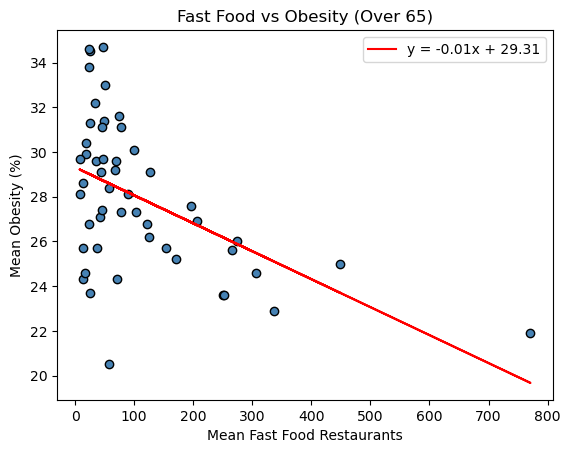

The r^2 value is: 0.09


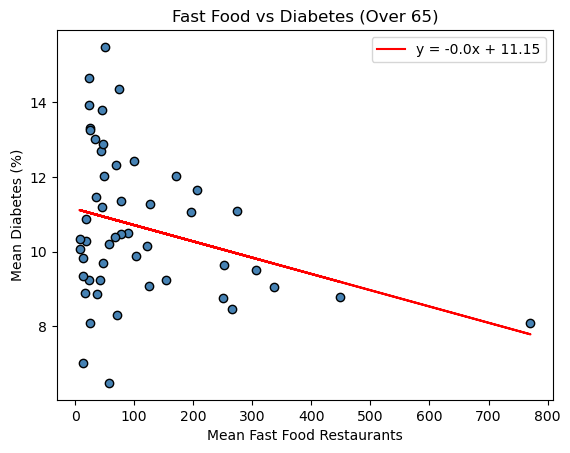

<Figure size 640x480 with 0 Axes>

In [139]:
#Analize the population over 65 years old
over_65_filter = statistics["Mean over 65 population"]

# Now filter the fast food and disease data for the corresponding over 65 years old population
x_over_65 = statistics["Mean Fast Food Rests"].loc[over_65_filter.index]  # Mean Fast Food Restaurants for states with Over 65 data
y_obesity_over_65 = statistics["Mean Obesity"].loc[over_65_filter.index]  # Obesity for the same states
y_diabetes_over_65 = statistics["Mean Diabetes"].loc[over_65_filter.index]  # Diabetes for the same states

# Plot Linear Regression for Fast Food vs Obesity (for Over 65 population)
plot_linear_regression(x_over_65, y_obesity_over_65, x_label="Mean Fast Food Restaurants", y_label="Mean Obesity (%)", title="Fast Food vs Obesity (Over 65)")

# Plot Linear Regression for Fast Food vs Diabetes (for Over 65 population)
plot_linear_regression(x_over_65, y_diabetes_over_65, x_label="Mean Fast Food Restaurants", y_label="Mean Diabetes (%)", title="Fast Food vs Diabetes (Over 65)")


plt.savefig("output_data_ages/Fig1.png")



## Insights 

Obesity

The slope of the regression line, -0.01, suggests a very slight negative relationship
between the number of fast food restaurants and obesity rate. For every additional 
fast food restaurants, the obesity rate decreases by 0.01%, acoording to the model. 

The intercept value of 29.31 indicates that if there were zero fast food restaurants,
the predicted obesity rate would be 29.31%.

The R^2 value of 0.26 implies that only 26% of the variablity in the obesisty rate
can be explained by the number of fast food restaurants. This indicates a weak 
explanatory power and suggest that other factors not included in the model significantly
influence obesity rates. 

The regression model demonstrates a minimal negative association between the number of fast
food restaurants and obesity rates among individuals under 18 years old. However
the relationship is weak, as evidenced by the low R^2 value.

The analysis does not provide strong evidence to support a susbtancial impact of the number of fast 
restuarnats on the obesity rate in the under-18 population.

Diabetes

The slope of the regression line, −0.0 indicates no meaningful change in diabetes rates 
as the number of fast food restaurants increases. This suggests a negligible relationship.

The intercept value of 11.15 represents the predicted diabetes rate when there are zeo fast 
food restaurants. This baseline value implies that other factors likely contribute to 
the diabetes rate.

The R^2 value of 0.09 suggests that only 9% of the variation in the diabetes rate can 
be explained by the number of fast food 


### Analize the population under 18 years old

The r^2 value is: 0.26


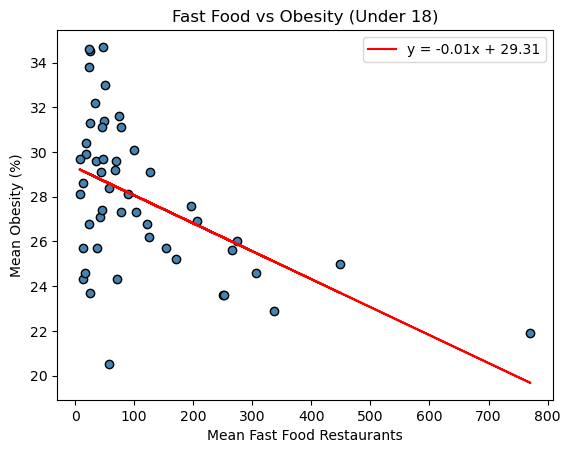

The r^2 value is: 0.09


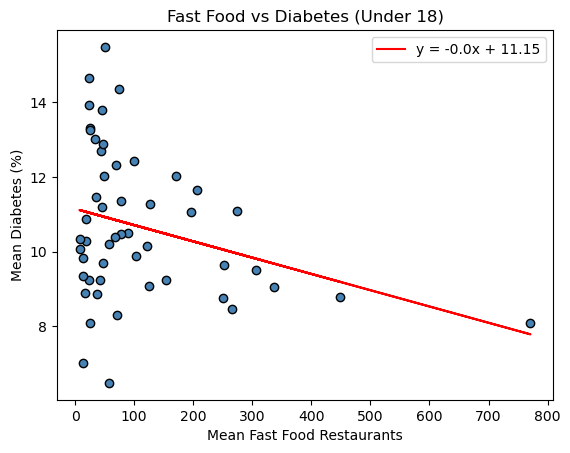

<Figure size 640x480 with 0 Axes>

In [133]:
#Analize the population under 18 years old
under_18_filter = statistics["Mean under 18 population"]

# Now filter the fast food and disease data for the corresponding over 65 years old population
x_under_18 = statistics["Mean Fast Food Rests"].loc[under_18_filter.index]  # Mean Fast Food Restaurants for states with under 18 data
y_obesity_under_18 = statistics["Mean Obesity"].loc[under_18_filter.index]  # Obesity for the same states
y_diabetes_under_18 = statistics["Mean Diabetes"].loc[under_18_filter.index]  # Diabetes for the same states

# Plot Linear Regression for Fast Food vs Obesity (for Under 18 population)
plot_linear_regression(x_under_18, y_obesity_under_18, x_label="Mean Fast Food Restaurants", y_label="Mean Obesity (%)", title="Fast Food vs Obesity (Under 18)")

# Plot Linear Regression for Fast Food vs Diabetes (for Under 18 population)
plot_linear_regression(x_under_18, y_diabetes_under_18, x_label="Mean Fast Food Restaurants", y_label="Mean Diabetes (%)", title="Fast Food vs Diabetes (Under 18)")

plt.savefig("output_data_ages/Fig2.png")

## Insights 

Obesity

The slope of the regression line, -0.01, suggests a very slight negative relationship
between the number of fast food restaurants and obesity rate. For every additional 
fast food restaurants, the obesity rate decreases by 0.01%, acoording to the model. 

The intercept value of 29.31 indicates that if there were zero fast food restaurants,
the predicted obesity rate would be 29.31%.

The R^2 value of 0.26 implies that only 26% of the variablity in the obesisty rate
can be explained by the number of fast food restaurants. This indicates a weak 
explanatory power and suggest that other factors not included in the model significantly
influence obesity rates. 

The regression model demonstrates a minimal negative association between the number of fast
food restaurants and obesity rates among individuals under 18 years old. However
the relationship is weak, as evidenced by the low R^2 value.

The analysis does not provide strong evidence to support a susbtancial impact of the number of fast 
restuarnats on the obesity rate in the under-18 population.

Diabetes

The slope of the regression line, −0.0 indicates no meaningful change in diabetes rates 
as the number of fast food restaurants increases. This suggests a negligible relationship.

The intercept value of 11.15 represents the predicted diabetes rate when there are zeo fast 
food restaurants. This baseline value implies that other factors likely contribute to 
the diabetes rate.

The R^2 value of 0.09 suggests that only 9% of the variation in the diabetes rate can 
be explained by the number of fast food 


## T-Test

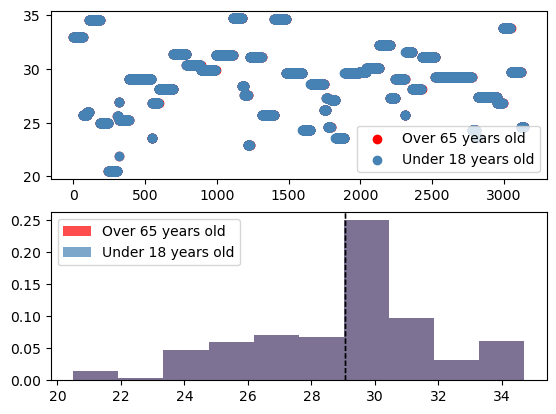

In [134]:
obesity_over_65 = df_analysis["OBESE_12(%)"][df_analysis["OVER65_PPL_10(%)"]>0].dropna()
obesity_under_18 = df_analysis["OBESE_12(%)"][df_analysis["UNDER18_PPL_10(%)"] > 0].dropna()

plt.subplot(2,1,1)
plt.scatter(range(len(obesity_over_65)), obesity_over_65, label="Over 65 years old", color="r")
plt.scatter(range(len(obesity_under_18)), obesity_under_18, label="Under 18 years old", color="steelblue")
plt.legend()

plt.subplot(2,1,2)
plt.hist(obesity_over_65, bins = 10, alpha = 0.7, label ="Over 65 years old", color="r", density=True)
plt.hist(obesity_under_18, bins = 10, alpha = 0.7, label ="Under 18 years old", color="steelblue", density=True)
plt.axvline(obesity_over_65.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(obesity_under_18.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()

plt.savefig("output_data_ages/Fig3.png")


plt.show()


In [135]:
stats.ttest_ind(obesity_over_65, obesity_under_18, equal_var=False)

TtestResult(statistic=-0.02310810716836264, pvalue=0.9815647726405614, df=6282.999979782095)

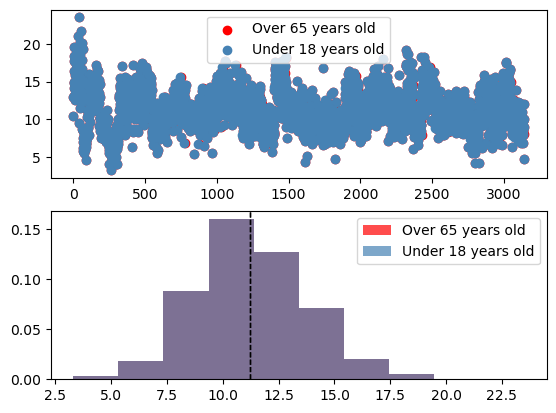

In [136]:
diabetes_over_65 = df_analysis["DIABETES_13(%)"][df_analysis["OVER65_PPL_10(%)"]>0].dropna()
diabetes_under_18 = df_analysis["DIABETES_13(%)"][df_analysis["UNDER18_PPL_10(%)"] > 0].dropna()

plt.subplot(2,1,1)
plt.scatter(range(len(diabetes_over_65)), diabetes_over_65, label="Over 65 years old", color="r")
plt.scatter(range(len(diabetes_under_18)), diabetes_under_18, label="Under 18 years old", color="steelblue")
plt.legend()

plt.subplot(2,1,2)
plt.hist(diabetes_over_65, bins = 10, alpha = 0.7, label ="Over 65 years old", color="r", density=True)
plt.hist(diabetes_under_18, bins = 10, alpha = 0.7, label ="Under 18 years old", color="steelblue", density=True)
plt.axvline(diabetes_over_65.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(diabetes_under_18.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()


# Save the figure
plt.savefig("output_data_ages/Fig4.png")

plt.show()

In [137]:
stats.ttest_ind(diabetes_over_65, diabetes_under_18, equal_var=False)

TtestResult(statistic=0.00032424399757003736, pvalue=0.9997413010220335, df=6280.99856804242)

In [138]:
df_renamed.to_csv("Resources/Data_cleaned_ages.csv", index = False)

## Null Hypothesis
H0: There is no significant difference in the impact of fast food on obesity or diabetes between the population over 64 years old
and the population under 18 years old

## Alternative Hypothesis
Ha: There is a significant difference in the impact of fast food on obesity or diabetes between the population over 65 years old 
and the population under 18 years old

## Obesity analysis
### T-Test Result:
###      t-static: -0.0231
###      p-value : 0.9816
###      df : 6283
The p-value is much larger than the standard significance leve. (0.05). This
indicates that we fail to reject the null hypothesis for the obesity analysis. 
There is no statistically significant difference in the impact of fast food on
obesity between the two age groups

## Diabetes analysis
### T-Test Result:
###      t-static: 0.0003
###      p-value : 0.9997
###      df : 6281
The p-value is significantly larger than the standard significance level (0.05). This indicate that there is no statisticaly difference in the impact of fast food on diabetes between the two age groups


## Conclusion

Both analyses suggest that fast food establishments do not have a significantly different impact on obesity or diabetes rates acroos the two age groups.

